# IMDB sentiment analysis with scikit-learn

## Fetch data

In [2]:
import tensorflow as tf
import numpy as np
import math 
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd 
import random
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=4000)

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

In [3]:
len(word_index)

88584

In [4]:
x_train[0]

"[bos] this film was just brilliant casting location scenery story direction [oov] really suited the part they played and you could just imagine being there robert [oov] is an amazing actor and now the same being director [oov] father came from the same [oov] island as myself so i loved the fact there was a real connection with this film the witty [oov] throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [oov] and would recommend it to everyone to watch and the fly [oov] was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [oov] to the two little [oov] that played the [oov] of norman and paul they were just brilliant children are often left out of the [oov] list i think because the stars that play them all grown up are such a big [oov] for the whole film but these children are amazing and should be [oov] for what they have done 

## Alternative:

In [4]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xvf  'aclImdb_v1.tar.gz'

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open ''aclImdb_v1.tar.gz''


## Create the vocabulary

In [5]:
from collections import Counter

vocabulary = list()
train_words = list()
sorted_words = list()
for text in x_train:
  tokens = text.split()
  train_words.extend(tokens)

Counter = Counter(train_words)
Counter_copy = Counter
temp = Counter.most_common(3998)
for key in temp:
    sorted_words.append(key[0])

#n=99, m = 1000, k = 2898
k=list()
n=list()
m = Counter.most_common(1100)
j=0
for key in m:
  j+=1
  if(j>=101):
    vocabulary.append(key[0])
 

for i in range(1,100):
  n.append(sorted_words[i])
j=0
for key in sorted_words:
  j+=1
  if(j<=1100):
    sorted_words.remove(key)
k = sorted_words.copy()

print(len(vocabulary))

1000


## Create binary vectors 

In [6]:
from tqdm import tqdm

x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary)

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary)
#print(x_test_binary[0])
y_train_list = y_train.tolist()
print(x_train_binary[0])

vocabulary_indexes = list()
for i in range(len(vocabulary)):
  vocabulary_indexes.append(i)

100%|██████████| 25000/25000 [01:33<00:00, 267.16it/s]


[0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Naive Bayes classifier


In [8]:
class Naive_Bayes:
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for c in self._classes:
            X_c = X[c==y]
            self._mean[c,:] = X_c.mean(axis=0)
            self._var[c,:] = X_c.var(axis=0)
            self._priors[c] = X_c.shape[0] / float(n_samples)
                        
    def predict(self,X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self,x):
        post = []   
        for idx ,c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            cond = np.sum(np.log(self._pred(idx,x)))
            prt = prior + cond
            post.append(prt)
        return self._classes[np.argmax(post)]
    
    def _pred(self,class_idx,x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        num = np.exp(-(x-mean)**2 / (2*var))
        den = np.sqrt(2* np.pi * var)
        return num / den



# class Naive_Bayes:

#     def __init__(self):
#         #Λίστες με τις πιθανότητες να έχουμε την κάθε λέξη δεδομένου πως έχουμε αρνητικό ή θετικό review αντίστοιχα
#         self.x1_while_c_is_negative = list()
#         self.x1_while_c_is_positive = list()
#         #καθολικές μεταβλητές με την πιθανότητα να έχουμε αρνητικό review και θετικό review αντιστοιχα
#         self.p_c0 = float(0)
#         self.p_c1 = float(0)

#     def fit(self, X, Y):
#         #Initialisations of elements:
#         self.x1_while_c_is_negative = []
#         self.x1_while_c_is_positive = []
#         reviews = len(Y) 
#         neg_reviews = 0 
#         pos_reviews = 0
#         sum_pos =  list() #Σε καθε θέση i του πίνακα: Πόσες φορες εμφανίζεται η λεξη i ενώ έχουμε θετικό review
#         sum_neg =  list() #Σε καθε θέση i του πίνακα: Πόσες φορες εμφανίζεται η λεξη i ενώ έχουμε αρνητικό review
#         p_ex_pos = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 1) 
#         p_ex_neg = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 0) 

#         #Υπολογισμός της γενικής πιθανότητας να έχουμε θετικό ή αρνητικό review:
#         for i in range(reviews):
#             if Y[i] == 0:
#                 neg_reviews += 1
#             else:
#                 pos_reviews += 1
#         self.pc0 = pos_reviews/reviews
#         self.pc1 = neg_reviews/reviews

#         #Υπολογισμός πιθανοτήτων να έχουμε την κάθε λέξη δεδομένου πως έχουμε αρνητικό ή θετικό review αντίστοιχα:
        

#         #Αρχικοποίηση λιστών με μετρητές
#         for i in range(len(vocabulary)):
#             #βάζουμε ήδη 1 για να αποφύγουμε το να μην υπάρχει κάν μια λέξη
#             sum_pos.append(0) 
#             sum_neg.append(0)

#         for i in range(reviews):
#             for j in range(len(vocabulary)):
#                 if(Y[i] == 0 and X[i][j]==1):
#                     sum_neg[j] +=1
#                 elif(Y[i] == 1 and X[i][j]==1):
#                     sum_pos[j] +=1
        

#         #Λίστες πιθανοτήτων να έχουμε την κάθε λέξη δεδομένου πως έχουμε αρνητικό ή θετικό review 
#         for i in range(0,1000):
#             p_ex_pos.append(0) 
#             p_ex_neg.append(0)
#         #for i in range(len(p_ex_neg_train)):
#         for i in range(len(vocabulary)):
#             p_ex_neg[i] = (sum_neg[i]+1)/(neg_reviews+2) #P(Xi = 1 | C = 0) 
#         for i in range(len(vocabulary)):
#             p_ex_pos[i] = (sum_pos[i]+1)/(pos_reviews+2) #P(Xi = 1 | C = 1)

#         p_ex_neg = np.round(p_ex_neg, decimals=2)
#         p_ex_pos = np.round(p_ex_pos, decimals=2)

#         self.x1_while_c_is_positive = p_ex_pos.copy()
#         self.x1_while_c_is_negative = p_ex_neg.copy()

#     def predict(self, X):

#         # In Naive Bayes classification here we used logarithms to prevent numerical underflow when dealing with probabilities. 
#         # The standard Naive Bayes equation is the following: 
#         # P(Class∣Features) = P(Features∣Class) * P(Class) / P(Features)
#         # The logarithmic transformation simplifies computations:
#         # log(P(Class∣Features)) = log(P(Features∣Class)) + log(P(Class)) - log(P(Features))
#         # This ensures numerical stability and precision in probabilistic models.


#         predictions = list()
#         for i in range(len(X)):

#             # Initialize log probabilities
#             log_pc0 = np.log(self.pc0)
#             log_pc1 = np.log(self.pc1)
#             pc0 = self.pc0
#             pc1 = self.pc1

#             # Calculate log probability for negative class (C=0)
#             for xi in range(len(X[i])):
#                 if X[i][xi] == 0:
#                     log_pc0 += np.log(1 - self.x1_while_c_is_negative[xi])
#                     pc0 +=(1 - self.x1_while_c_is_negative[xi])
#                 else:
#                     log_pc0 += np.log(self.x1_while_c_is_negative[xi])
#                     pc0 += (self.x1_while_c_is_negative[xi])

#             # Calculate log probability for positive class (C=1)
#             for xi in range(len(X[i])):
#                 if X[i][xi] == 1:
#                     log_pc1 += np.log(self.x1_while_c_is_positive[xi])
#                     pc1 += (self.x1_while_c_is_positive[xi])
#                 else:
#                     log_pc1 += np.log(1 - self.x1_while_c_is_positive[xi])
#                     pc1 += (1 - self.x1_while_c_is_positive[xi])

#             if log_pc0 < log_pc1:
#                 predictions.append(1)
#             else:
#                 predictions.append(0)

#         return predictions


In [10]:
tool = Naive_Bayes()
y_train_list = y_train.tolist()
y_test_list = y_test.tolist()
tool.fit(x_train_binary, y_train_list)
y_pred = tool.predict(x_train_binary)
sum=0
for i in range(len(y_train_list)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test) 

# sum = 0
# p1 = tool.x1_while_c_is_negative.copy()
# p2 = tool.x1_while_c_is_positive.copy()
tool2 = Naive_Bayes()
# tool2.fit(x_test_binary, y_test_list)
y_pred = tool.predict(x_test_binary)
sum=0
for i in range(len(y_train_list)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test) 

print(sum)



82.844
81.896
20474


[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 0 ... 1 0 0]
Split training examples :  1
Split training examples :  2
Split training examples :  3
Split training examples :  4


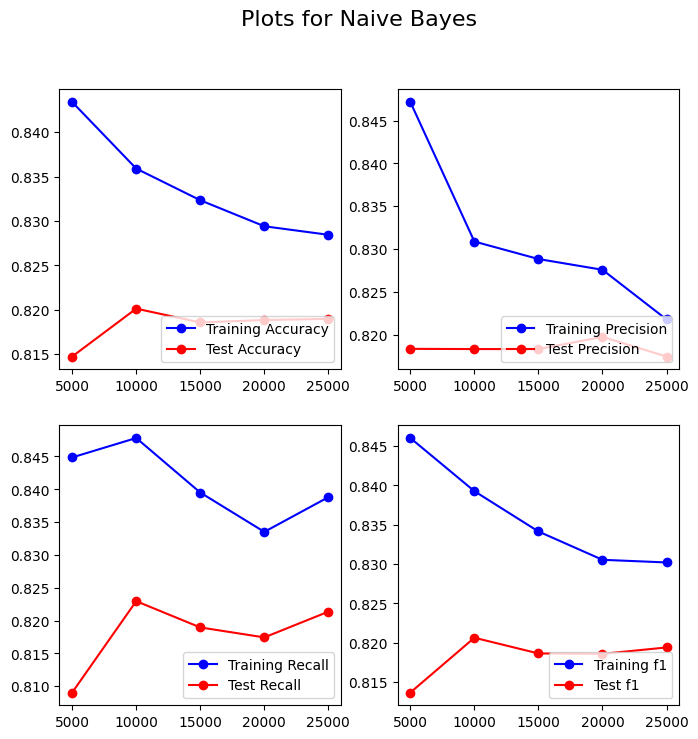

{'trainA': [0.8434, 0.8359, 0.8323333333333334, 0.8294, 0.82844],
 'testA': [0.81472, 0.82012, 0.81856, 0.81884, 0.81896],
 'trainP': [0.8471839306813707,
  0.8308766485647789,
  0.8288335517693316,
  0.8275759675343958,
  0.8217728662120856],
 'testP': [0.8183363003722285,
  0.8183119879086787,
  0.8183053557154276,
  0.8197352587244284,
  0.817436305732484],
 'trainR': [0.844854673998429,
  0.8478131802889373,
  0.8395061728395061,
  0.8335161000897219,
  0.8388],
 'testR': [0.80904, 0.82296, 0.81896, 0.81744, 0.82136],
 'trainF': [0.8460176991150442,
  0.8392594769321188,
  0.8341357251203587,
  0.8305354127346777,
  0.8301991369412882],
 'testF': [0.8136615978759353,
  0.8206294124685892,
  0.8186325469812075,
  0.8185860204286001,
  0.819393455706305]}

In [24]:
def custom_curve(estimator, x_train, y_train, x_test, y_test, n_splits, title, zoom_out= False):

  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)

  train_acc, test_acc, train_prec, test_prec, train_rec, test_rec, train_f, test_f = list(), list(), list(), list(), list(), list(), list(), list()

  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8), dpi=100, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
  fig.suptitle("Plots for {title}".format(title=title), fontsize = 16)

  curr_x = x_splits[0]
  curr_y = y_splits[0]
  
  print(curr_x, curr_y)
  estimator.fit(curr_x, curr_y)

  train_predict = estimator.predict(curr_x)
  test_predict = estimator.predict(x_test)

  train_acc.append(accuracy_score(curr_y, train_predict))
  test_acc.append(accuracy_score(y_test, test_predict))

  train_prec.append(precision_score(curr_y, train_predict))
  test_prec.append(precision_score(y_test, test_predict))

  train_rec.append(recall_score(curr_y, train_predict))
  test_rec.append(recall_score(y_test, test_predict))

  train_f.append(f1_score(curr_y, train_predict))
  test_f.append(f1_score(y_test, test_predict))

  for i in range(1, len(x_splits)):
    print("Split training examples : " ,i)
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    estimator.fit(curr_x, curr_y)

    train_predict = estimator.predict(curr_x)
    test_predict = estimator.predict(x_test)

    train_acc.append(accuracy_score(curr_y, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

    train_prec.append(precision_score(curr_y, train_predict))
    test_prec.append(precision_score(y_test, test_predict))

    train_rec.append(recall_score(curr_y, train_predict))
    test_rec.append(recall_score(y_test, test_predict))

    train_f.append(f1_score(curr_y, train_predict))
    test_f.append(f1_score(y_test, test_predict))
    
  x = list(range(split_size, len(x_train) + split_size, split_size))

  ax1.plot(x, train_acc, 'o-', color="b",  label='Training Accuracy')
  ax1.plot(x, test_acc, 'o-', color="red",label='Test Accuracy')
  ax1.legend(loc="lower right")
  
  ax2.plot(x, train_prec, 'o-', color="b",  label='Training Precision')
  ax2.plot(x, test_prec, 'o-', color="red",label='Test Precision')
  ax2.legend(loc="lower right")

  ax3.plot(x, train_rec, 'o-', color="b",  label='Training Recall')
  ax3.plot(x, test_rec, 'o-', color="red",label='Test Recall')
  ax3.legend(loc="lower right")

  ax4.plot(x, train_f, 'o-', color="b",  label='Training f1')
  ax4.plot(x, test_f, 'o-', color="red",label='Test f1')
  ax4.legend(loc="lower right")

  if zoom_out:
    ax1.axis(ymin= 0.0, ymax= 1.0)
    ax2.axis(ymin= 0.0, ymax= 1.0)
    ax3.axis(ymin= 0.0, ymax= 1.0)
    ax4.axis(ymin= 0.0, ymax= 1.0)
  plt.show()

  data = {
    'trainA' : train_acc,
    'testA' : test_acc,
    'trainP' : train_prec,
    'testP' : test_prec,
    'trainR' : train_rec,
    'testR' : test_rec,
    'trainF' : train_f,
    'testF' : test_f
  }

  return data

tool = Naive_Bayes()
tool.fit(x_train_binary, y_train_list)
custom_curve(tool, x_train_binary, y_train, x_test_binary, y_test, 5, "Naive Bayes", zoom_out= False)

In [ ]:
def compare_two_classification_algorithms(estimator1, estimator2, x_train, y_train, x_test, y_test, n_splits, title1, title2, zoom_out= False):
  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)

  train_acc_1, test_acc_1, train_prec_1, test_prec_1, train_rec_1, test_rec_1, train_f_1, test_f_1 = list(), list(), list(), list(), list(), list(), list(), list()

  train_acc_2, test_acc_2, train_prec_2, test_prec_2, train_rec_2, test_rec_2, train_f_2, test_f_2 = list(), list(), list(), list(), list(), list(), list(), list()

  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16), dpi=100, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
  fig.suptitle("Plots Comparing {title1} vs {title2}".format(title1=title1, title2= title2), fontsize = 16)

  curr_x = x_splits[0]
  curr_y = y_splits[0]
  
  estimator1.fit(curr_x, curr_y)
  estimator2.fit(curr_x, curr_y)

  train_predict_1 = estimator1.predict(curr_x)
  test_predict_1 = estimator1.predict(x_test)

  train_predict_2 = estimator2.predict(curr_x)
  test_predict_2 = estimator2.predict(x_test)

  #estimator 1
  train_acc_1.append(accuracy_score(curr_y, train_predict_1))
  test_acc_1.append(accuracy_score(y_test, test_predict_1))

  train_prec_1.append(precision_score(curr_y, train_predict_1))
  test_prec_1.append(precision_score(y_test, test_predict_1))

  train_rec_1.append(recall_score(curr_y, train_predict_1))
  test_rec_1.append(recall_score(y_test, test_predict_1))

  train_f_1.append(f1_score(curr_y, train_predict_1))
  test_f_1.append(f1_score(y_test, test_predict_1))
  #estimator 2
  train_acc_2.append(accuracy_score(curr_y, train_predict_2))
  test_acc_2.append(accuracy_score(y_test, test_predict_2))

  train_prec_2.append(precision_score(curr_y, train_predict_2))
  test_prec_2.append(precision_score(y_test, test_predict_2))

  train_rec_2.append(recall_score(curr_y, train_predict_2))
  test_rec_2.append(recall_score(y_test, test_predict_2))

  train_f_2.append(f1_score(curr_y, train_predict_2))
  test_f_2.append(f1_score(y_test, test_predict_2))

  for i in range(1, len(x_splits)):
    print("Split training examples : " ,i)
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    estimator1.fit(curr_x, curr_y)
    estimator2.fit(curr_x, curr_y)

    train_predict_1 = estimator1.predict(curr_x)
    test_predict_1 = estimator1.predict(x_test)

    train_predict_2 = estimator2.predict(curr_x)
    test_predict_2 = estimator2.predict(x_test)

    #estimator 1
    train_acc_1.append(accuracy_score(curr_y, train_predict_1))
    test_acc_1.append(accuracy_score(y_test, test_predict_1))

    train_prec_1.append(precision_score(curr_y, train_predict_1))
    test_prec_1.append(precision_score(y_test, test_predict_1))

    train_rec_1.append(recall_score(curr_y, train_predict_1))
    test_rec_1.append(recall_score(y_test, test_predict_1))

    train_f_1.append(f1_score(curr_y, train_predict_1))
    test_f_1.append(f1_score(y_test, test_predict_1))
    #estimator 2
    train_acc_2.append(accuracy_score(curr_y, train_predict_2))
    test_acc_2.append(accuracy_score(y_test, test_predict_2))

    train_prec_2.append(precision_score(curr_y, train_predict_2))
    test_prec_2.append(precision_score(y_test, test_predict_2))

    train_rec_2.append(recall_score(curr_y, train_predict_2))
    test_rec_2.append(recall_score(y_test, test_predict_2))

    train_f_2.append(f1_score(curr_y, train_predict_2))
    test_f_2.append(f1_score(y_test, test_predict_2))


  x = list(range(split_size, len(x_train) + split_size, split_size))

  ax1.plot(x, train_acc_1, 'o-', color="cyan",  label='Training Accuracy for {title1}'.format(title1= title1))
  ax1.plot(x, test_acc_1, 'o-', color="maroon",label='Test Accuracy for {title1}'.format(title1= title1))
  ax1.plot(x, train_acc_2, 'o-', color="gold",  label='Training Accuracy for {title2}'.format(title2= title2))
  ax1.plot(x, test_acc_2, 'o-', color="olive",label='Test Accuracy for {title2}'.format(title2= title2))
  ax1.legend(loc="lower right")
  
  ax2.plot(x, train_prec_1, 'o-', color="cyan",  label='Training Precision for {title1}'.format(title1= title1))
  ax2.plot(x, test_prec_1, 'o-', color="maroon",label='Test Precision for {title1}'.format(title1= title1))
  ax2.plot(x, train_prec_2, 'o-', color="gold",  label='Training Precision {title2}'.format(title2= title2))
  ax2.plot(x, test_prec_2, 'o-', color="olive",label='Test Precision {title2}'.format(title2= title2))
  ax2.legend(loc="lower right")

  ax3.plot(x, train_rec_1, 'o-', color="cyan",  label='Training Recall for {title1}'.format(title1= title1))
  ax3.plot(x, test_rec_1, 'o-', color="maroon",label='Test Recall for {title1}'.format(title1= title1))
  ax3.plot(x, train_rec_2, 'o-', color="gold",  label='Training Recall {title2}'.format(title2= title2))
  ax3.plot(x, test_rec_2, 'o-', color="olive",label='Test Recall {title2}'.format(title2= title2))
  ax3.legend(loc="lower right")

  ax4.plot(x, train_f_1, 'o-', color="cyan",  label='Training f1 {title1}'.format(title1= title1))
  ax4.plot(x, test_f_1, 'o-', color="maroon",label='Test f1 {title1}'.format(title1= title1))
  ax4.plot(x, train_f_2, 'o-', color="gold",  label='Training f1 {title2}'.format(title2= title2))
  ax4.plot(x, test_f_2, 'o-', color="olive",label='Test f1 {title2}'.format(title2= title2))
  ax4.legend(loc="lower right")

  if zoom_out:
    ax1.axis(ymin= 0.0, ymax= 1.0)
    ax2.axis(ymin= 0.0, ymax= 1.0)
    ax3.axis(ymin= 0.0, ymax= 1.0)
    ax4.axis(ymin= 0.0, ymax= 1.0)
  plt.show()

  data1 = {
    'trainA' : train_acc_1,
    'testA' : test_acc_1,
    'trainP' : train_prec_1,
    'testP' : test_prec_1,
    'trainR' : train_rec_1,
    'testR' : test_rec_1,
    'trainF' : train_f_1,
    'testF' : test_f_1
  }

  data2 = {
    'trainA' : train_acc_2,
    'testA' : test_acc_2,
    'trainP' : train_prec_2,
    'testP' : test_prec_2,
    'trainR' : train_rec_2,
    'testR' : test_rec_2,
    'trainF' : train_f_2,
    'testF' : test_f_2
  }

  return data1, data2

def compare_two_classification_algorithms(estimator1, estimator2, x_train, y_train, x_test, y_test, n_splits, title1, title2, zoom_out= False):

In [14]:
from sklearn.metrics import classification_report
nb = Naive_Bayes()
nb.fit(x_train_binary, y_train)

# Using Naive Bayes Classifier
y = nb.predict(x_test_binary)
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12500
           1       0.82      0.82      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



## ID3 Classifier

In [26]:
#The formula for calculating the entropy is:
#H(C) = -P(C=0)*log2(P(C=0)) -P(C=1)*log2(P(C=1))
#And it is used in the calculation of the Information Gain as follows:
#IG(Y,Xi)= H(C) - P(Xi = 1)*H(C|Xi=1) + P(Xi = 0)*H(C|Xi=0)
#Which, if we want to alanlyze more, becomes:
#IG(Y,Xi)= H(C) - 
#         (P(X=1)*( -(P(C=1|X=1)*log2(P(C=1|X=1))) - (P(C=0|X=1)*log2(P(C=0|X=1))) +
#		   P(X=0)*( -(P(C=1|X=0)*log2(P(C=1|X=0))) - (P(C=0|X=0)*log2(P(C=0|X=0))))

def IG(Y, Xi):

    #Part A: Calculating the H(C) = -P(C=0)*log2(P(C=0)) -P(C=1)*log2(P(C=1))
    Hc = 0
    for c in range(2):
        pc = list(Y).count(c)/len(Y) #P(C=Ci) = (Number of Ci)/(All C instances)
        Hc += - pc * math.log(pc, 2)

    #Part B: Calculating the IG(Y,Xi)= H(C) - P(Xi = 1)*H(C|Xi=1) + P(Xi = 0)*H(C|Xi=0)
    #this will happen in two repetitions: one for Xi=0 and one for Xi=1
    Hc_second = 0
    for feature in range(2):
        p = list(Xi).count(feature)/len(Xi) #P(X = i) = (Number of Xi=feat)/(All features of Xi)
        
        #finding the number of Y instances for which X=Xi, which will be used for calculating the P(C=c|X=x)
        Ys = list()  
        for i in range(len(Xi)):
            if Xi[i] == feature:
                Ys.append(Y[i])

        #Calculating the H(C=c|X=x) = ( -(P(C=1|X=x)*log2(P(C=1|X=x))) - (P(C=0|X=x)*log2(P(C=0|X=x))) (for x in [0,1])
        for c in range(2):
            if len(Ys)!=0:
                pc_while_x = Ys.count(c)/len(Ys) #P(C=c|X=x) = (Instances of C for which C=c and X=x)/(All instances of C for which X=x)
                if pc_while_x != 0:
                    H = - p * pc_while_x * math.log(pc_while_x, 2)
                    Hc_second += H
    ig = Hc - Hc_second
    return ig    


class Tree():
    def __init__(self):
        self.word = "no word yet" #Η λέξη με την οποία θα έγινε το classification ενός υπόδεντρου
        self.tag = None #1 αν ο κόμβος έχει reviews με τη λέξη με την οποία έγινε το classification, 0 αν δεν την έχουν
        self.children = list() #τα παιδία ενός κόμβου
        self.classification = int #Η τελική classification. Παίρνει τιμή μόνο αν έχει γίνει 
    
    def new_child(self, node):
        self.children.append(node)

class ID3():
    def __init__(self, max_depth = 10):
        self.max_depth = max_depth
        self.depth = 0

    def most_IG(self, X, Y, vocabulary):

        max_gain = -1
        max_word= -1


        for w in vocabulary:
            x_word = list() #Λίστα με όλες τις τιμές που θα πάρει μια λέξη στον Χ
            for ex in range(len(X)):
                x_word.append(X[ex][w])
            word_ig = IG(Y, x_word) #Στέλνουμε το Υ και την λίστα στον ΙG, για να βρει το informtion gain της λέξης ανάλογικά με το Υ

            if(word_ig>max_gain):
                max_gain = word_ig
                max_word = w

        return max_word #Η λέξη με το μέγιστο Information Gain

    def fit(self, X, Y, vocabulary, default):
       
        if(len(Y) == 0):
            #αν φτάσαμε εδώ τελείωσαν τα Υ γιατί τελείωσε η κατάταξη κάθε review στο δέντρο.
            #Παίρνει για τιμή του classification εκείνη που επικρατούσε στο παραπάνω επίπεδο του δέντρο
            node = Tree()
            node.classification = default 
            return node 

        if(len(set(Y)) == 1):
            #Η μέθοδος set επιστρέφει ένα set με όλες τις διαφορετικές τιμές που περιλαμβάνει το όρισμα της, εδώ το Υ
            #Άρα φτάσαμε εδώ αν το Υ έχει μόνο μια τιμη, η οποία θα χρησιμοποιηθεί στο classification και σταματάει η διαδικασία. 
            node = Tree()
            node.classification = Y[0]
            return node

        if(len(vocabulary) == 0):
            #Αν φτάσαμε εδώ χρησιμοποιήσαμε όλες τις λέξεις οπότε δεν γίνονται παραπάνω κατατάξεις.
            #Η διαδικασία σταματάει και γίνεται classified με την τιμή που επικρατεί στα Y
            node = Tree()
            if(Y.count(0)>Y.count(1)):
                max_count = 0
            else:
                max_count = 1
            node.classification = max_count
            return node

        if (self.depth == self.max_depth):
            #Αν είμαστε εδώ φτάσαμε το max depth του δέντρου
            #Η διαδικασία σταματάει και γίνεται classified με την τιμή που επικρατεί στα Y. 
            #Αν έχουμε ισοπαλία αρνητικών θετικών reviews παίρνουμε το default, δηλαδή αυτή που επικρατούσε στο παραπάνω επίπεδο
            yes = True
            node = Tree()
            if((Y.count(0))>Y.count(1)):
                node.classification = 0
            elif((Y.count(0))<Y.count(1)):
                node.classification = 1
            else:
                node.classification =default
            return node

        #Σταματάει η διαδικασία αν υπερτερεί στα εναπομείναντα reviews είτε το 0 είτε το 1
        if (float(Y.count(1))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 1                   
            return node
        
        if(float(Y.count(0))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 0
            return node

        #Αποθήκευση του clssification που επικρατεί μέχρι στιγμης ώστε να περασθεί ως default στα παρακάτω επίπεδα
        if(Y.count(1)>Y.count(0)):
            max_count = 1
        else:
            max_count = 0


        best_word = self.most_IG(X, Y, vocabulary) #Εύρεση της λέξης με το μέγιστο Information Gain 
        tree = Tree() #Αρχικοποίηση υπόδεντρου

        #το νεο λεξιλόγιο, χωρίς την λέξη που θα χρσιμοποιηθέι για τον διαχωρισμό σε φύλλα τωρα ωστέ να μην ξαναχρησιμοποιηθεί μετά
        new_vocabulary = vocabulary.copy() 
        new_vocabulary.remove(best_word)
        self.depth += 1 #ενημέρωση του depth

        for zero_or_one in range(2):
            # if(zero_or_one==0):
            #     print(len(new_vocabulary))
            #Oι νέες λίστες reviews, δημιουργούνται 2 για κάθε κατηγορία(Υ και Χ) λόγω της for, μια με τη best_word και μία χωρις 
            x_new = list()
            y_new = list()
            for i in range(len(X)):
                if X[i][best_word] == zero_or_one:
                    x_new.append(X[i])
                    y_new.append(Y[i])
            subtree = self.fit(x_new, y_new, new_vocabulary, max_count)
            subtree.tag = zero_or_one 
            subtree.word = best_word
            tree.new_child(subtree)            
                
        return tree

    def singular_prediction(self, X, tree):
        sub_tree = tree #Αρχικοποίηση Υπόδεντρου
        flag = False
        while not flag:
            word_feature = sub_tree.children[0].word #Παίρνουμε τη λέξη με την οποία έγινε ο διαχωρισμός
            for sub in sub_tree.children:
                if (sub.tag == X[word_feature]): 
                    #Αν υπάρχει η λέξη-κριτήριο με την οποία έγινε ο διαχωρισμος σε αυτο το επίπεδο στο sample που κοιταμε 
                    # πάμε στο υπόδεντρο οπόυ το tag είναι 1(δηλ. έχει reviews που την περιλαμβανουν), αλλιώς σε αυτο που ειναι 0
                    sub_tree = sub
            if(sub_tree.classification == 1 or sub_tree.classification == 0):
                #Σταματάμε αν φτάσουμε σε κάποιο φυλλο. Τα φύλλα έχουν τιμή 0 ή 1 και αυτο καταλήγει να ειναι το classification
                # του sample. Οι άλλοι ενδιάμεσοι κόμβοι έχουν None στο classification
                flag = True
        return sub_tree.classification

    def predict(self, tree, X):
        y_pred = list()
        for i in range(len(X)):
            y_pred.append(self.singular_prediction(X[i], tree)) #πρόβλεψη για κάθε review ξεχωριστά
        
        return y_pred

In [27]:
model = ID3(400)
y_train_list = y_train.tolist()
y_test_list = y_test.tolist()
trained_tree = model.fit(x_train_binary, y_train_list, vocabulary_indexes, 0)

y_pred = model.predict(trained_tree, x_train_binary)
sum=0
for i in range(len(y_test)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

#trained_tree = model.fit(x_test_binary, y_test_list, vocabulary_indexes, 0)
y_pred = model.predict(trained_tree, x_test_binary)
y_test_list = y_test.tolist()
sum=0
for i in range(len(y_test)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

KeyboardInterrupt: 

## Random Forest classifier

In [28]:
import random

class Random_Forest():
    def __init__(self, num_of_words, trees = 10):
        self.num_of_words = num_of_words #Αριθμός των λέξεων
        self.trees = trees #Αριθμός των δέντρων που θα φτιαχθούν
        self.forest = list() #Λίστα Δέντων

    def new_sample(self, X, Y):
        #Αρχικοποίηση των νέων x και y
        x_new = list()
        y_new = list()

        y_indexes = list() #Tα indexes των reviews που δεν έχουν επιλεχθεί
        for i in range(len(Y)):
            y_indexes.append(i)

        for i in range(len(X)):
            #Τυχαία επιλογή reviews για το υποσύνολο που θα επιστρέψει η μέθοδος, χρησιμοποιώντας τα indexes που φτιάχτηκε πάνω
            random_choice = random.choice(y_indexes) 
            x_new.append(X[random_choice])
            y_new.append(Y[random_choice])

        return x_new, y_new

    def new_vocabulary(self, X):
        #Λίστα με τα indexes του λεξιλογιου για τυχαία επιλογή των νέων λέξεων του νέου λεξιλογίου που επιστρέφει η μέθοδος 
        words_indexes = list()
        for x in range(len(X[0])):
            words_indexes.append(x)

        new_words = list()
        for i in range(self.num_of_words):
            random_word = random.choice(words_indexes) #Tυχαία επιλογή λέξης
            words_indexes.remove(random_word) #Αφαίρεση από το παλιό λεξιλόγιο
            new_words.append(random_word) #Εισαγωγή στο καινούριο

        return new_words

    def fit(self, X, Y, max_depth = 10):
        for i in range(self.trees):
            id3 = ID3(max_depth) #Δημιουργία id3 δέντρου
            random_x, random_y = self.new_sample(X, Y)
            tree = id3.fit(random_x, random_y, self.new_vocabulary(random_x), 0)
            self.forest.append(tree)

    def predict(self, X):
        y_pred = list()
        for i in range(len(X)):
            zeros =0
            ones = 0
            for j in range(self.trees):
                id3 = ID3()
                prediction = id3.singular_prediction(X[i], self.forest[j])
                if (prediction == 1):
                    ones += 1
                elif(prediction==0):
                    zeros +=1
            if ones>zeros:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred

In [75]:
model = Random_Forest(len(vocabulary))
trained_forest = model.fit(x_train_binary, y_train_list)
y_pred = model.predict(x_train_binary)
y_train_list = y_train.tolist()
sum=0
for i in range(len(y_train)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test)

y_pred = model.predict(x_test_binary)
y_test_list = y_test.tolist()
sum=0
for i in range(len(y_test)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

71.244
71.408


[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 0 ... 1 0 0]
Split training examples :  1
Split training examples :  2
Split training examples :  3
Split training examples :  4


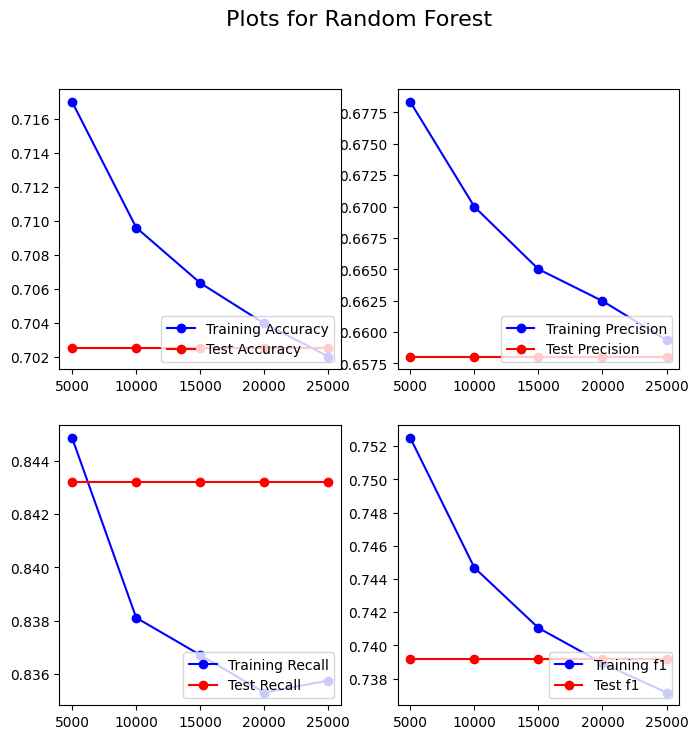

{'trainA': [0.717, 0.7096, 0.7063333333333334, 0.70395, 0.702],
 'testA': [0.70252, 0.70252, 0.70252, 0.70252, 0.70252],
 'trainP': [0.6783349101229896,
  0.6699889258028793,
  0.6650137159738342,
  0.6624762808349146,
  0.6593663216359505],
 'testP': [0.6580508210026846,
  0.6580508210026846,
  0.6580508210026846,
  0.6580508210026846,
  0.6580508210026846],
 'trainR': [0.844854673998429,
  0.8381159707104691,
  0.8367184388689765,
  0.8353105373342637,
  0.83576],
 'testR': [0.8432, 0.8432, 0.8432, 0.8432, 0.8432],
 'trainF': [0.7524925660311351,
  0.7446808510638299,
  0.7410499088824879,
  0.7389214692005821,
  0.7371577758961332],
 'testF': [0.7392081916050075,
  0.7392081916050075,
  0.7392081916050075,
  0.7392081916050075,
  0.7392081916050075]}

In [29]:
tool = Random_Forest(len(vocabulary))
custom_curve(tool, x_train_binary, y_train, x_test_binary, y_test, 5, "Random Forest", zoom_out= False)